In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent.parent

sys.path.append(str(ROOT_DIR))
print("Ruta añadida al sys.path:", ROOT_DIR)

Ruta añadida al sys.path: c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Mercado Libre


In [6]:
# Obtener la ruta de los datos
from src.data.load_data import load_data, codificar_variables
from src.features.balanceo import preprocess_data, split_data
from src.models.train_models import entrenar_modelos, entrenar_final, entrenar_xgboost_final, entrenar_catboost_final
from src.models.evaluate_model import evaluar_modelo, plot_roc_curve
from src.config import DATA_PATH
import pandas as pd

In [7]:
DATA_PATH_ = ROOT_DIR / DATA_PATH
df = pd.read_csv(DATA_PATH_)

# Estructura 
print("🔍 Dimensiones:", df.shape)
print("\n🧱 Tipos de datos:\n", df.dtypes)

# Primeras filas
print("\n👀 Primeras filas:")
display(df.head())

# Revisión de nulos
print("\n🚨 Nulos por columna:\n", df.isnull().sum())

# Duplicados
print("\n📎 Registros duplicados:", df.duplicated().sum())

🔍 Dimensiones: (100000, 26)

🧱 Tipos de datos:
 id                         object
title                      object
date_created               object
base_price                float64
price                     float64
category_id                object
tags                       object
attributes                 object
variations                 object
pictures                   object
seller_id                  object
seller_country             object
seller_province            object
seller_city                object
seller_loyalty             object
buying_mode                object
shipping_mode              object
shipping_admits_pickup     object
shipping_is_free           object
status                     object
sub_status                 object
warranty                   object
is_new                      int64
initial_quantity          float64
sold_quantity             float64
available_quantity        float64
dtype: object

👀 Primeras filas:


C:\Users\aleja\AppData\Local\Temp\ipykernel_23372\1398371809.py:2: DtypeWarning: Columns (10,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH_)


,id,title,date_created,base_price,price,category_id,tags,attributes,variations,pictures,...,shipping_mode,shipping_admits_pickup,shipping_is_free,status,sub_status,warranty,is_new,initial_quantity,sold_quantity,available_quantity
0,MLA578569012,Escritorio Secretter Espectacular,2015-09-08T21:17:57.000Z,6700.0,6700.0,MLA1902,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,custom,True,False,active,NaN,NaN,0,1.0,0.0,1.0
1,MLA576883746,Stassen Espatulas Milenio Numero 3 Codigo 590-3,2015-08-29T12:55:03.000Z,119.0,119.0,MLA3530,['dragged_bids_and_visits'],[],[],"[{'size': '500x375', 'secure_url': 'https://a2...",...,not_specified,False,False,active,NaN,Sí,1,19.0,0.0,19.0
2,MLA581002506,Charm Britania Plata 925 Ovalado!!! Armá La Tu...,2015-09-23T12:41:07.000Z,450.0,450.0,MLA6440,['dragged_bids_and_visits'],[],[],"[{'size': '312x308', 'secure_url': 'https://a2...",...,me2,False,False,active,NaN,Sí,1,2.0,0.0,2.0
3,MLA574707083,El Hombre De Magallanes Virginia Carreño Novela,2015-08-16T13:34:01.000Z,40.0,40.0,MLA2044,['dragged_bids_and_visits'],[],[],"[{'size': '375x500', 'secure_url': 'https://a2...",...,me2,True,False,active,NaN,Sí,0,1.0,0.0,1.0
4,MLA576209717,Molde Placa Boca Espejo Bota Labial Chupetin P...,2015-08-25T14:42:20.000Z,30.0,30.0,MLA34294,['dragged_bids_and_visits'],[],[],"[{'size': '396x500', 'secure_url': 'https://a2...",...,not_specified,True,False,active,NaN,NaN,1,1.0,1.0,1.0



🚨 Nulos por columna:
 id                            4
title                         4
date_created                  4
base_price                    4
price                         8
category_id                   4
tags                          4
attributes                    4
variations                    4
pictures                      4
seller_id                     4
seller_country                7
seller_province               7
seller_city                   8
seller_loyalty                4
buying_mode                   4
shipping_mode                 4
shipping_admits_pickup        4
shipping_is_free              4
status                        4
sub_status                99014
warranty                  60894
is_new                        0
initial_quantity              4
sold_quantity                 4
available_quantity            4
dtype: int64

📎 Registros duplicados: 0


In [8]:
# Valores únicos por columna
print("\n🔢 Valores únicos por columna:")
for col in df.columns:
    print(f"- {col}: {df[col].nunique()} valores únicos")


🔢 Valores únicos por columna:
- id: 99996 valores únicos
- title: 98816 valores únicos
- date_created: 87072 valores únicos
- base_price: 10331 valores únicos
- price: 10330 valores únicos
- category_id: 10911 valores únicos
- tags: 12 valores únicos
- attributes: 3454 valores únicos
- variations: 8193 valores únicos
- pictures: 98152 valores únicos
- seller_id: 43380 valores únicos
- seller_country: 3 valores únicos
- seller_province: 26 valores únicos
- seller_city: 3655 valores únicos
- seller_loyalty: 11 valores únicos
- buying_mode: 4 valores únicos
- shipping_mode: 6 valores únicos
- shipping_admits_pickup: 5 valores únicos
- shipping_is_free: 6 valores únicos
- status: 5 valores únicos
- sub_status: 3 valores únicos
- warranty: 10264 valores únicos
- is_new: 2 valores únicos
- initial_quantity: 451 valores únicos
- sold_quantity: 317 valores únicos
- available_quantity: 470 valores únicos


In [9]:
num_cols = df.select_dtypes(include="number").columns

print("\n📊 Estadísticas de variables numéricas:")
display(df[num_cols].describe().T)



📊 Estadísticas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
base_price,99996.0,55067.927890,8.632656e+06,0.840000,90.0,250.0,800.0,2.222222e+09
price,99992.0,52528.456969,8.623472e+06,0.840000,90.0,250.0,800.0,2.222222e+09
is_new,100000.0,0.537530,4.985920e-01,0.000000,0.0,1.0,1.0,1.000000e+00
initial_quantity,99996.0,35.093704,4.210845e+02,0.000000,1.0,1.0,2.0,9.999000e+03
sold_quantity,99996.0,2.397116,4.268593e+01,0.000000,0.0,0.0,0.0,8.676000e+03
available_quantity,99996.0,34.840368,4.208171e+02,-58.422839,1.0,1.0,2.0,9.999000e+03


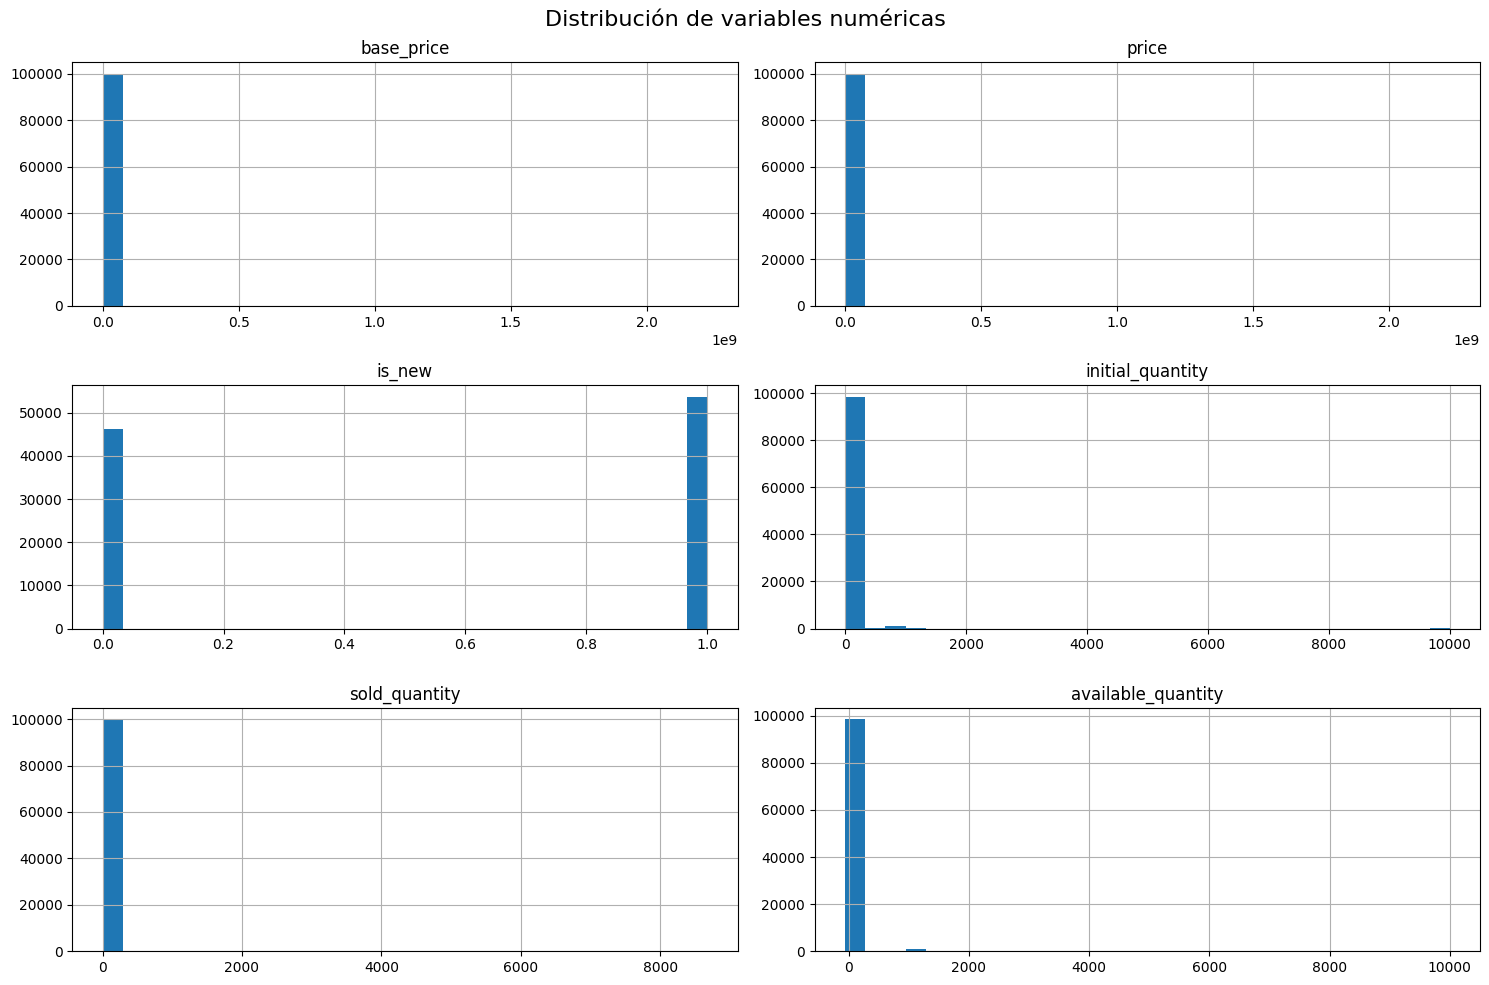

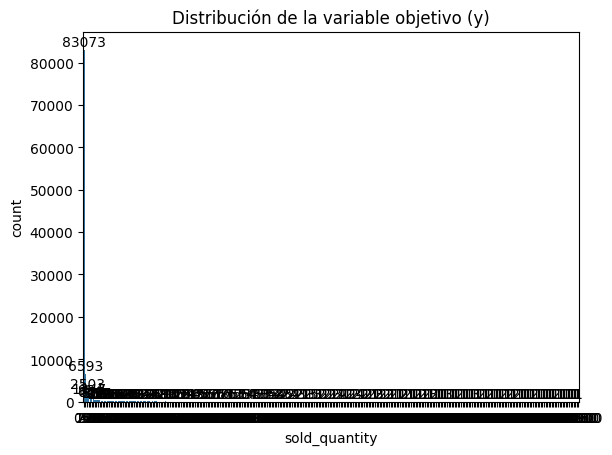

In [11]:
# Histograma de numéricas
df[num_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.tight_layout()
plt.show()

# Conteo de la variable objetivo
ax = sns.countplot(data=df, x='sold_quantity')
plt.title("Distribución de la variable objetivo (y)")
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',                # El texto que se muestra
                (p.get_x() + p.get_width() / 2., count),  # Posición (centro de la barra, altura)
                ha='center', va='bottom',   # Alineación horizontal y vertical
                fontsize=10, color='black')

plt.show()


In [12]:
# Detectar columnas categóricas
cat_cols = df.select_dtypes(include="object").columns

# Mostrar el conteo absoluto y relativo por cada categoría
for col in cat_cols:
    print(f"\n📌 {col.upper()} - {df[col].nunique()} categorías únicas")
    print("Conteo absoluto:")
    print(df[col].value_counts())
    print("\nPorcentaje relativo (%):")
    print((df[col].value_counts(normalize=True) * 100).round(2))



📌 ID - 99996 categorías únicas
Conteo absoluto:
id
MLA578569012    1
MLA576883746    1
MLA581002506    1
MLA574707083    1
MLA576209717    1
               ..
MLA579464055    1
MLA578257287    1
MLA581361773    1
MLA576082728    1
MLA582542755    1
Name: count, Length: 99996, dtype: int64

Porcentaje relativo (%):
id
MLA578569012    0.0
MLA576883746    0.0
MLA581002506    0.0
MLA574707083    0.0
MLA576209717    0.0
               ... 
MLA579464055    0.0
MLA578257287    0.0
MLA581361773    0.0
MLA576082728    0.0
MLA582542755    0.0
Name: proportion, Length: 99996, dtype: float64

📌 TITLE - 98816 categorías únicas
Conteo absoluto:
title
50 Suspensores Para Short De Baño Tela Calada                   78
50 Suspensores Para Short De Baño Nido De Abeja                 47
Confeccion Short De Baño Bermudas Hombre Y Niño                 34
50 Suspensores Para Short De Baño Tela Nido De Abeja            31
12 Suspensores Para Short De Baño Tela Calada                   31
                   

In [19]:
df.dtypes

id                         object
title                      object
date_created               object
base_price                float64
price                     float64
category_id                object
tags                       object
attributes                 object
variations                 object
pictures                   object
seller_id                  object
seller_country             object
seller_province            object
seller_city                object
seller_loyalty             object
buying_mode                object
shipping_mode              object
shipping_admits_pickup     object
shipping_is_free           object
status                     object
sub_status                 object
warranty                   object
is_new                      int64
initial_quantity          float64
sold_quantity             float64
available_quantity        float64
dtype: object

In [9]:
df_encoded = codificar_variables(df)
#df_encoded.drop(columns=['duration', 'pdays'], inplace=True)

#df_encoded.drop(columns=['contact_unknown', 'duration', 'pdays', 'contact_telephone', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'previous'], inplace=True)

In [10]:
df_encoded.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'contact_telephone',
       'contact_unknown', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [12]:
# 1. Split con 30% para testeo
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

X_train, X_test, y_train, y_test = split_data(X, y)

df_train = X_train.copy()
df_train['y'] = y_train

# 2. Balanceo SOLO el entrenamiento
X_train_bal, y_train_bal = preprocess_data(df=df_train)



In [12]:
# 3. Entrenamiento de modelos con CV
resultados_cv, modelos_dict = entrenar_modelos(X_train_bal, y_train_bal)


c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Similares\project_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Similares\project_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Similares\project_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:01:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrai

In [15]:
resultados_cv

{'LogisticRegression': {'precision_mean': np.float64(0.8779015155718739),
  'recall_mean': np.float64(0.8603341013824884),
  'roc_auc_mean': np.float64(0.9380792279277301)},
 'RandomForest': {'precision_mean': np.float64(0.93654630594188),
  'recall_mean': np.float64(0.8992793138760881),
  'roc_auc_mean': np.float64(0.9687748061590227)},
 'XGBoost': {'precision_mean': np.float64(0.9219703334991258),
  'recall_mean': np.float64(0.9039196108550946),
  'roc_auc_mean': np.float64(0.9680542571867458)},
 'CatBoost': {'precision_mean': np.float64(0.9153459919767748),
  'recall_mean': np.float64(0.8924923195084485),
  'roc_auc_mean': np.float64(0.9616207208689926)}}

In [12]:

# 4. Entrenar modelo final (XGBoost por ejemplo)
modelo_xgboost = entrenar_xgboost_final(X_train_bal, y_train_bal)
modelo_catboost = entrenar_catboost_final(X_train_bal, y_train_bal)

c:\Users\aleja\Documents\Alejandro Duran Carpeta\Proyectos Data Science\Prueba Técnica Similares\project_venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:13:13] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Mejores parámetros para XGBoost: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300}
Mejores parámetros para CatBoost: {'depth': 8, 'learning_rate': 0.1}


In [25]:
# Evaluar en test
metricas_xgboost = evaluar_modelo(modelo_xgboost, X_test, y_test)
print(metricas_xgboost)

metricas_catboost = evaluar_modelo(modelo_catboost, X_test, y_test)
print(metricas_catboost)

'''
Mejores parámetros para XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 500, 'subsample': 1.0}
Mejores parámetros para CatBoost: {'depth': 10, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.05}
{'threshold': 0.2, 'accuracy': 0.8798820928518791, 'precision': 0.4830917874396135, 'recall': 0.6410256410256411, 'f1': 0.5509641873278237, 'confusion_matrix': array([[1094,  107],
       [  56,  100]]), 'auc': 0.8930111659087513}
{'threshold': 0.2, 'accuracy': 0.8511422254974208, 'precision': 0.41015625, 'recall': 0.6730769230769231, 'f1': 0.5097087378640777, 'confusion_matrix': array([[1050,  151],
       [  51,  105]]), 'auc': 0.8873001131535686}
'''

{'threshold': 0.3, 'accuracy': 0.7774502579218865, 'precision': 0.3128205128205128, 'recall': 0.782051282051282, 'f1': 0.4468864468864469, 'confusion_matrix': array([[933, 268],
       [ 34, 122]]), 'auc': 0.863124212728709}
{'threshold': 0.3, 'accuracy': 0.8717759764185704, 'precision': 0.45408163265306123, 'recall': 0.5705128205128205, 'f1': 0.5056818181818182, 'confusion_matrix': array([[1094,  107],
       [  67,   89]]), 'auc': 0.8897713443924934}


"\nMejores parámetros para XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 500, 'subsample': 1.0}\nMejores parámetros para CatBoost: {'depth': 10, 'iterations': 500, 'l2_leaf_reg': 1, 'learning_rate': 0.05}\n{'threshold': 0.2, 'accuracy': 0.8798820928518791, 'precision': 0.4830917874396135, 'recall': 0.6410256410256411, 'f1': 0.5509641873278237, 'confusion_matrix': array([[1094,  107],\n       [  56,  100]]), 'auc': 0.8930111659087513}\n{'threshold': 0.2, 'accuracy': 0.8511422254974208, 'precision': 0.41015625, 'recall': 0.6730769230769231, 'f1': 0.5097087378640777, 'confusion_matrix': array([[1050,  151],\n       [  51,  105]]), 'auc': 0.8873001131535686}\n"

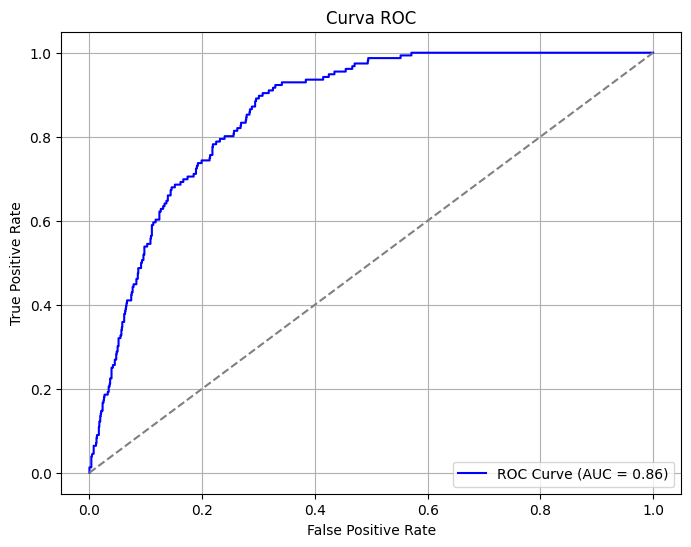

In [14]:
plot_roc_curve(modelo_xgboost, X_test, y_test)

Mejor threshold para F1: 0.450
Precision: 0.377
Recall: 0.679
F1-score: 0.485


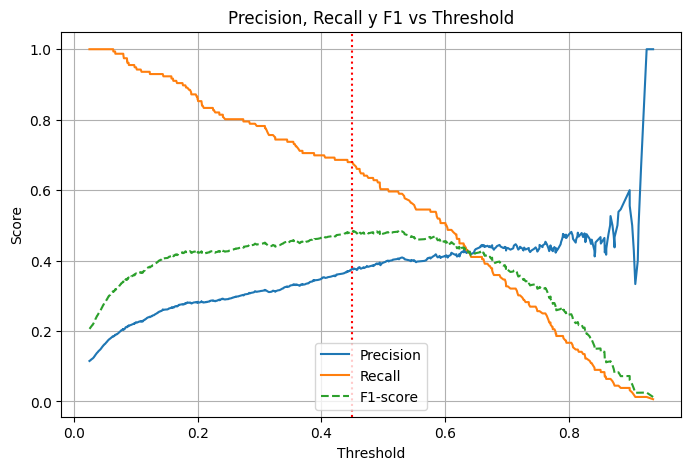

In [15]:
from sklearn.metrics import precision_recall_curve, f1_score
import matplotlib.pyplot as plt
import numpy as np

# 1. Obtener probabilidades del modelo
y_probs = modelo_xgboost.predict_proba(X_test)[:, 1]  # Prob de clase positiva

# 2. Calcular precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# 3. Calcular F1 para cada threshold
f1 = 2 * (precision * recall) / (precision + recall + 1e-6)  # evitar división por 0

# 4. Encontrar el mejor threshold (el de mayor F1)
best_idx = np.argmax(f1)
best_threshold = thresholds[best_idx]

print(f"Mejor threshold para F1: {best_threshold:.3f}")
print(f"Precision: {precision[best_idx]:.3f}")
print(f"Recall: {recall[best_idx]:.3f}")
print(f"F1-score: {f1[best_idx]:.3f}")

# 5. Graficar
plt.figure(figsize=(8,5))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, f1[:-1], label='F1-score', linestyle='--')
plt.axvline(best_threshold, color='red', linestyle=':')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall y F1 vs Threshold')
plt.legend()
plt.grid()
plt.show()


In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

def evaluar_threshold(y_true, y_probs, threshold):
    """
    Evalúa métricas para un threshold dado.

    Parámetros:
    - y_true: etiquetas reales
    - y_probs: probabilidades predichas para la clase positiva
    - threshold: umbral de decisión

    Retorna un diccionario con las métricas.
    """
    y_pred = (y_probs >= threshold).astype(int)

    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    resultado = {
        "threshold": threshold,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "confusion_matrix": cm
    }

    return resultado


In [20]:
# Obtener probabilidades del modelo
y_probs = modelo_xgboost.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva

# Probar con varios thresholds
for t in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    resultado = evaluar_threshold(y_test, y_probs, threshold=t)
    print(f"\nThreshold: {t}")
    print(f"Precision: {resultado['precision']:.3f}")
    print(f"Recall:    {resultado['recall']:.3f}")
    print(f"F1-score:  {resultado['f1']:.3f}")
    print("Matriz de confusión:\n", resultado['confusion_matrix'])



Threshold: 0.1
Precision: 0.224
Recall:    0.949
F1-score:  0.363
Matriz de confusión:
 [[689 512]
 [  8 148]]

Threshold: 0.2
Precision: 0.282
Recall:    0.859
F1-score:  0.425
Matriz de confusión:
 [[860 341]
 [ 22 134]]

Threshold: 0.3
Precision: 0.313
Recall:    0.782
F1-score:  0.447
Matriz de confusión:
 [[933 268]
 [ 34 122]]

Threshold: 0.4
Precision: 0.349
Recall:    0.699
F1-score:  0.466
Matriz de confusión:
 [[998 203]
 [ 47 109]]

Threshold: 0.5
Precision: 0.395
Recall:    0.603
F1-score:  0.477
Matriz de confusión:
 [[1057  144]
 [  62   94]]

Threshold: 0.6
Precision: 0.414
Recall:    0.506
F1-score:  0.455
Matriz de confusión:
 [[1089  112]
 [  77   79]]


In [17]:
"Los modelos mostraron excelente desempeño en validación cruzada, aunque también evidenciaron indicios de sobreajuste, por lo que recomendamos seguir con ajustes finos de hiperparámetros y validación más robusta en futuras etapas."

'Los modelos mostraron excelente desempeño en validación cruzada, aunque también evidenciaron indicios de sobreajuste, por lo que recomendamos seguir con ajustes finos de hiperparámetros y validación más robusta en futuras etapas.'

In [15]:
import pandas as pd

importancia = modelo_xgboost.feature_importances_
features = X_train.columns
importancia_df = pd.DataFrame({'feature': features, 'importance': importancia})
importancia_df = importancia_df.sort_values(by='importance', ascending=False)
print(importancia_df)


              feature  importance
4             housing    0.146735
26    contact_unknown    0.145113
8            duration    0.085155
5                loan    0.061858
24     marital_single    0.053062
18       job_services    0.048741
12    job_blue-collar    0.045228
23    marital_married    0.042099
20     job_technician    0.039502
10              pdays    0.038910
15     job_management    0.035962
14      job_housemaid    0.033443
21     job_unemployed    0.032805
17  job_self-employed    0.028911
13   job_entrepreneur    0.022552
16        job_retired    0.019034
7               month    0.018870
27     poutcome_other    0.018276
1           education    0.012770
9            campaign    0.011847
3             balance    0.011472
6                 day    0.011463
28   poutcome_success    0.007903
0                 age    0.007396
11           previous    0.007151
25  contact_telephone    0.006922
19        job_student    0.006819
2             default    0.000000
22        job_

In [21]:
DATA_PATH_COMPLETE = ROOT_DIR / "data/bank-full.csv"
df_complete = load_data(DATA_PATH_COMPLETE)

# Revisión de nulos
print("\n🚨 Nulos por columna:\n", df_complete.isnull().sum())

# Duplicados
print("\n📎 Registros duplicados:", df_complete.duplicated().sum())



🚨 Nulos por columna:
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

📎 Registros duplicados: 0


In [22]:
df_complete_encoded = codificar_variables(df_complete)
#df_complete_encoded.drop(columns=['duration', 'pdays'], inplace=True)

#df_complete_encoded.drop(columns=['contact_unknown', 'duration', 'pdays', 'contact_telephone', 'poutcome_other', 'poutcome_success', 'poutcome_unknown', 'previous'], inplace=True)

In [23]:
# Separar X / y
X = df_complete_encoded.drop("y", axis=1)
y = df_complete_encoded["y"]

In [24]:
# Evaluar en test
metricas_df_complete = evaluar_modelo(modelo_xgboost, X, y)
print(metricas_df_complete)

{'threshold': 0.3, 'accuracy': 0.8065293844418394, 'precision': 0.3575547866205306, 'recall': 0.8205709964076385, 'f1': 0.4980776955299248, 'confusion_matrix': array([[32124,  7798],
       [  949,  4340]]), 'auc': 0.8893955640233188}


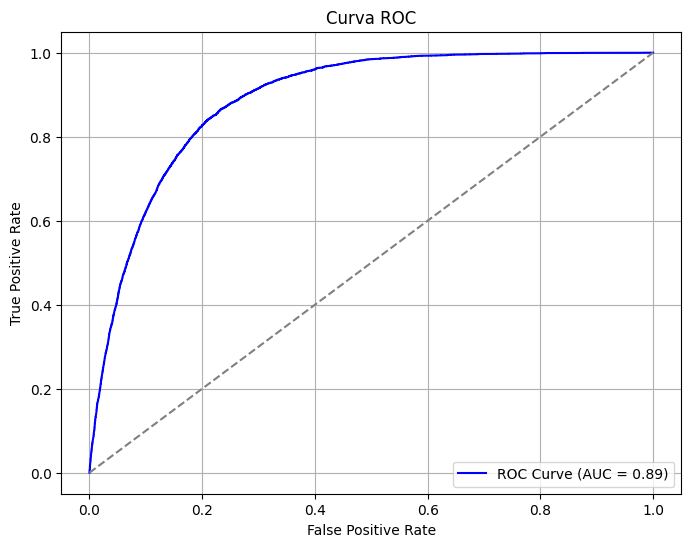

In [20]:
plot_roc_curve(modelo_xgboost, X, y)